#  Three numerical integration methods (Fibonacci, Lebedev and Gauss-Legendre) to perform the orientational averaging of the scattering intensity of a nanoprism over the unit sphere 



### 1. Visualize the points distribution on the unit sphere for each quadratures
### 2. Compare the intensities obtained from each quadratures and their computional times
\
**Important: the definition of number of points differs from each quadratures:** 
- **npoints_fibonacci**: the total number of points on the unit sphere
- **norder_lebedev**: the index of the list of the polygon order, which is orderlist=[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 35, 41, 47, 53, 59, 65, 71, 77, 83, 89, 95, 101, 107, 113, 119, 125, 131]
- **npoints_gauss_legendre**: the number of points per angles (phi and theta), the total number of points being n_points**2



In [1]:
%matplotlib widget
# from nanoprisms_fibonacci import *
from nanoprisms_quadratures import *
import numpy as np

from matplotlib import pyplot as plt
# import plotly.offline as pyo
# import plotly.graph_objs as go


### Define the parameters of the nanorprism

In [4]:
sld=1
sld_solvent=0
nsides=5 # number of sides of the prism base
Rave=600 # angs, average radius of the prism
L=3500 # angs, length of the prism


## 1. Visualize the points distribution on the unit sphere for each quadratures

In [5]:
# Here we define the parameters for a similar number of total points (~300)
orderlist=[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 35, 41, 47, 53, 59, 65, 71, 77, 83, 89, 95, 101, 107, 113, 119, 125, 131]
norder_lebedev= 5 # index order for lebedev -> order 13 of the polynome 
npoints_fibonacci = 300 # number of total points for fibonacci
npoints_gauss_legendre = 18 # number of points per angles (n_total = npoints_gauss_legendre**2) for gauss-legendre

### Visualize Fibonnaci sphere

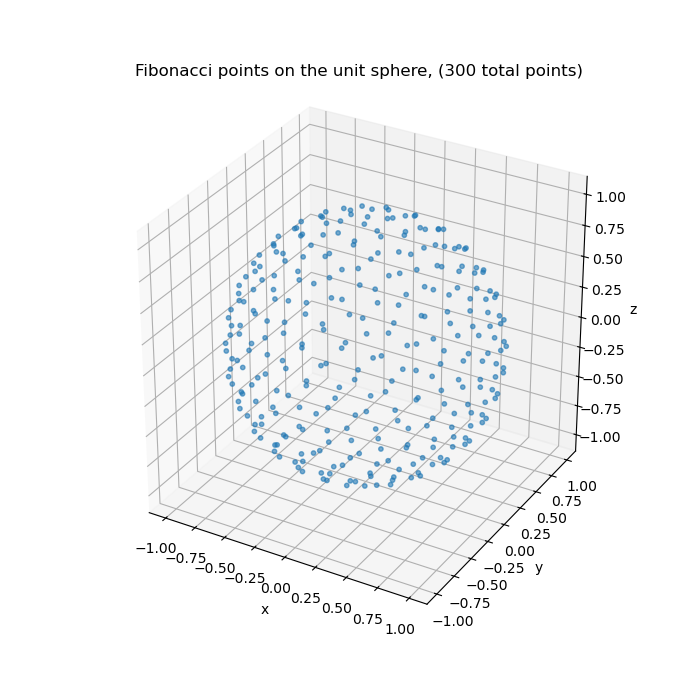

In [6]:
plot_fibonacci_sphere(npoints_fibonacci)

### Visualize Lebedev sphere

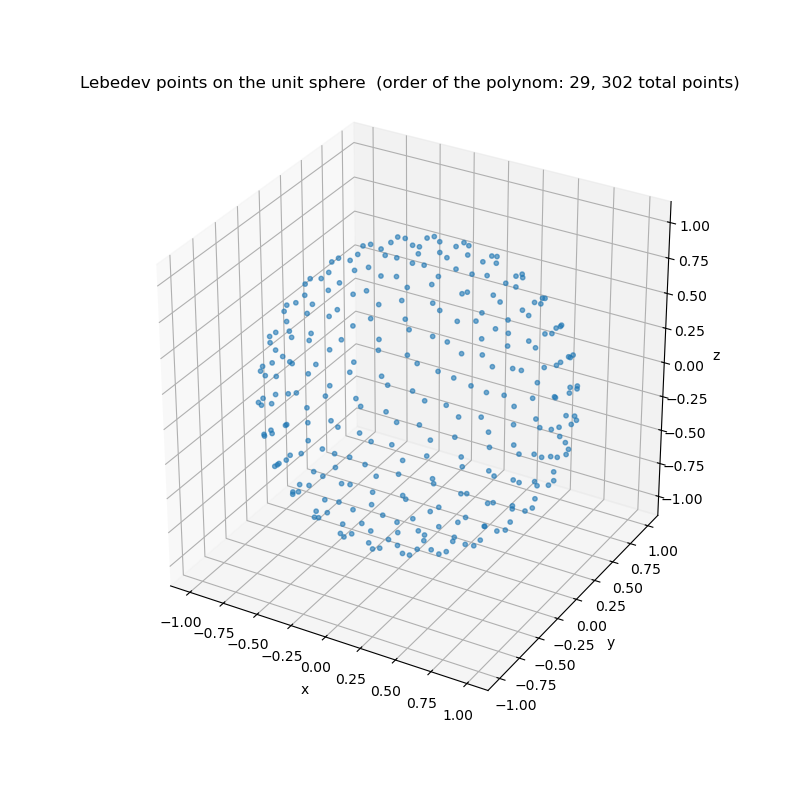

In [7]:

plot_lebedev_sphere(13, figsize=(8,8))

### Visualize Gauss Legendre sphere

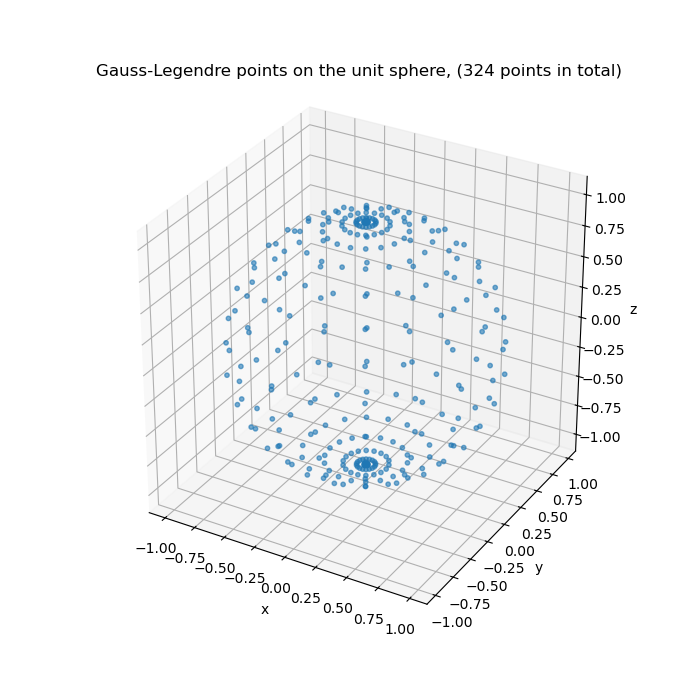

In [8]:

plot_gauss_sphere(npoints_gauss_legendre)


## 2. Compare the intensities obtained for each quadratures and their computional times

### As a start : compare intensities for similar smal amount of points (ex: 300 points)

Execution time Lebedev with 302 points: 0.0494 seconds
Execution time Fibonacci with 300 points: 0.0464 seconds
Execution time Gauss-Legendre with 324 points: 0.0481 seconds


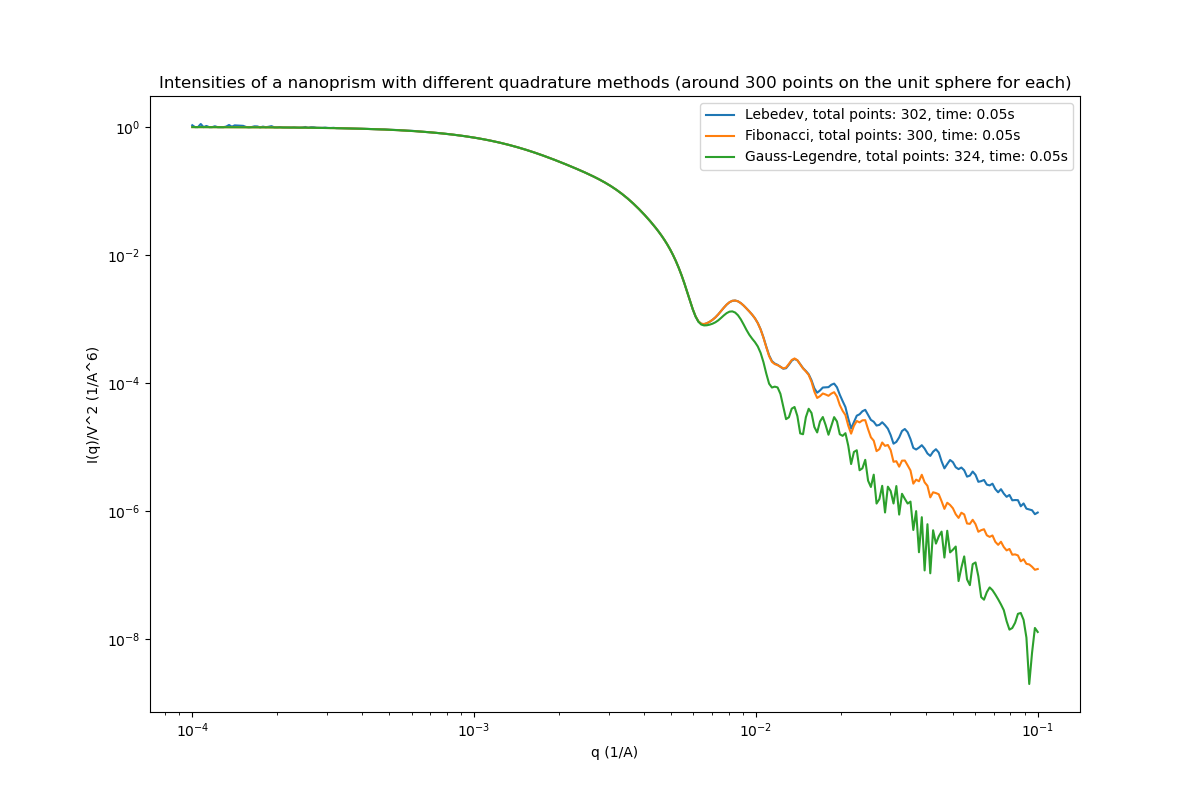

In [9]:
from matplotlib import pyplot as plt

# Define the q range
qs = np.logspace(-4,-1,300,base=10)

# Define the parameters 
norder_lebedev = 13 # index for the order of the polygon 
npoints_fibonacci = 300 # number of total points for fibonacci
npoints_gauss_legendre = 18 # number of points per angles (n_total = npoints_gauss_legendre**2) for gauss-legendre


# Define Iq, times, number of total points for each quadrature methods
Iq_leb, time_lebedev, n_points_total_lebedev = Iq_lebedev(qs,sld,sld_solvent,nsides,Rave,L,norder_lebedev)
Iq_fibo, time_fib, n_points_total_fibonacci = Iq_fibonacci(qs,sld,sld_solvent,nsides,Rave,L,npoints_fibonacci)
Iq_gauss, time_gauss, n_points_total_gauss = Iq_gauss_legendre(qs,sld,sld_solvent,nsides,Rave,L,npoints_gauss_legendre)


# Plot the results
plt.figure(figsize=(12,8))
plt.loglog(qs,Iq_leb/volume(nsides,Rave,L)**2 ,label=f'Lebedev, total points: {n_points_total_lebedev}, time: {time_lebedev:.2f}s' )
plt.loglog(qs,Iq_fibo/volume(nsides,Rave,L)**2, label=f'Fibonacci, total points: {n_points_total_fibonacci}, time: {time_fib:.2f}s' )
plt.loglog(qs,Iq_gauss/volume(nsides,Rave,L)**2, label=f'Gauss-Legendre, total points: {n_points_total_gauss}, time: {time_gauss:.2f}s' )
plt.xlabel('q (1/A)')
plt.ylabel('I(q)/V^2 (1/A^6)')
plt.title('Intensities of a nanoprism with different quadrature methods (around 300 points on the unit sphere for each)')
plt.legend()

### Let's see the number of points necessary for convergence for each classes

#### Lebedev

Execution time Lebedev with 74 points: 0.0124 seconds
Execution time Lebedev with 194 points: 0.0196 seconds
Execution time Lebedev with 434 points: 0.0647 seconds
Execution time Lebedev with 770 points: 0.1103 seconds
Execution time Lebedev with 1454 points: 0.2525 seconds
Execution time Lebedev with 3074 points: 0.5382 seconds
Execution time Lebedev with 5810 points: 0.8279 seconds


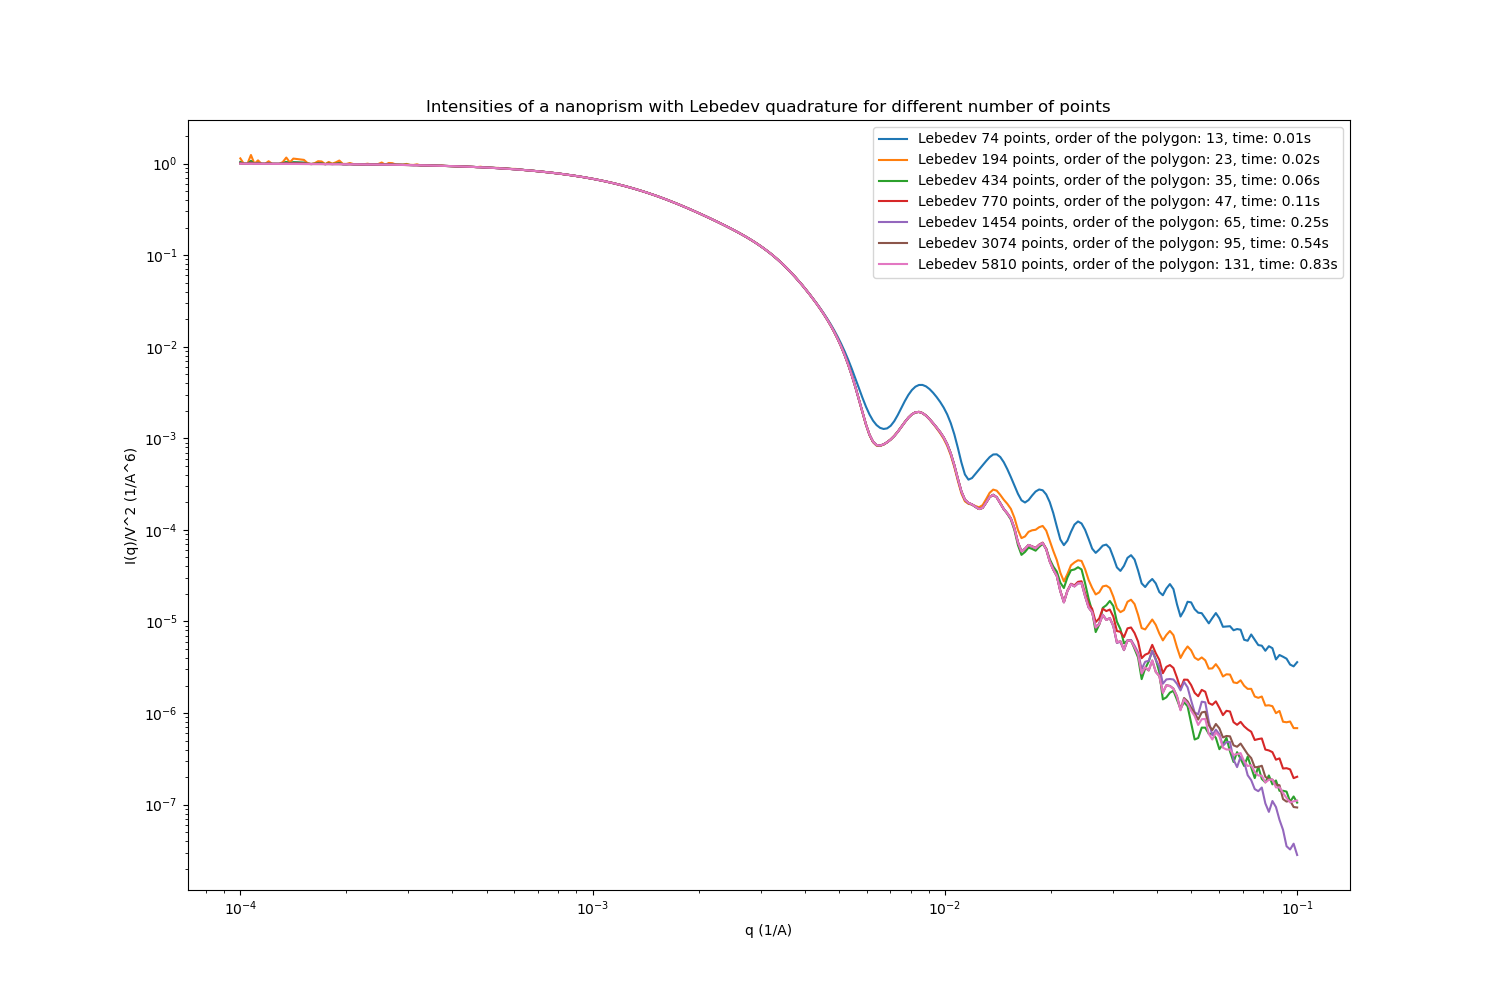

In [13]:
# apply the factor
from matplotlib import pyplot as plt

qs = np.logspace(-4,-1,300,base=10)


orderlist=[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 35, 41, 47, 53, 59, 65, 71, 77, 83, 89, 95, 101, 107, 113, 119, 125, 131]
# Pick different number of orders
norder_lebedev_1 = 5 
norder_lebedev_10 = 10
norder_lebedev_15 = 15
norder_lebedev_17 = 17
norder_lebedev_20 = 20
norder_lebedev_25 = 25
norder_lebedev_31= 31 # order for lebedev = 131
order_polygone_1 = orderlist[norder_lebedev_1]
order_polygone_10 = orderlist[norder_lebedev_10]
order_polygone_15 = orderlist[norder_lebedev_15]
order_polygone_17 = orderlist[norder_lebedev_17]
order_polygone_20 = orderlist[norder_lebedev_20]
order_polygone_25 = orderlist[norder_lebedev_25]
order_polygone_31 = orderlist[norder_lebedev_31]


# Define Iq and times for each quadrature methods and number of points

I_q_lebedev_1, time_lebedev_1, total_points_lebedev_1 = Iq_lebedev(qs,sld,sld_solvent,nsides,Rave,L,norder_lebedev_1)
I_q_lebedev_10, time_lebedev_10, total_points_lebedev_10 = Iq_lebedev(qs,sld,sld_solvent,nsides,Rave,L,norder_lebedev_10)
I_q_lebedev_15, time_lebedev_15, total_points_lebedev_15 = Iq_lebedev(qs,sld,sld_solvent,nsides,Rave,L,norder_lebedev_15)   
I_q_lebedev_17, time_lebedev_17, total_points_lebedev_17 = Iq_lebedev(qs,sld,sld_solvent,nsides,Rave,L,norder_lebedev_17)
I_q_lebedev_20, time_lebedev_20, total_points_lebedev_20 = Iq_lebedev(qs,sld,sld_solvent,nsides,Rave,L,norder_lebedev_20)       
I_q_lebedev_25, time_lebedev_25, total_points_lebedev_25 = Iq_lebedev(qs,sld,sld_solvent,nsides,Rave,L,norder_lebedev_25)       
I_q_lebedev_31, time_lebedev_31, total_points_lebedev_31 = Iq_lebedev(qs,sld,sld_solvent,nsides,Rave,L,norder_lebedev_31)  



# Plot the results

plt.figure(figsize=(15, 10))
plt.size=(20,30)
plt.loglog(qs,I_q_lebedev_1/volume(nsides,Rave,L)**2 ,label=f'Lebedev {total_points_lebedev_1} points, order of the polygon: {order_polygone_1}, time: {time_lebedev_1:.2f}s' )
plt.loglog(qs,I_q_lebedev_10/volume(nsides,Rave,L)**2 ,label=f'Lebedev {total_points_lebedev_10} points, order of the polygon: {order_polygone_10}, time: {time_lebedev_10:.2f}s' )
plt.loglog(qs,I_q_lebedev_15/volume(nsides,Rave,L)**2 ,label=f'Lebedev {total_points_lebedev_15} points, order of the polygon: {order_polygone_15}, time: {time_lebedev_15:.2f}s' )  
plt.loglog(qs,I_q_lebedev_17/volume(nsides,Rave,L)**2 ,label=f'Lebedev {total_points_lebedev_17} points, order of the polygon: {order_polygone_17}, time: {time_lebedev_17:.2f}s' )      
plt.loglog(qs,I_q_lebedev_20/volume(nsides,Rave,L)**2 ,label=f'Lebedev {total_points_lebedev_20} points, order of the polygon: {order_polygone_20}, time: {time_lebedev_20:.2f}s' )        
plt.loglog(qs,I_q_lebedev_25/volume(nsides,Rave,L)**2 ,label=f'Lebedev {total_points_lebedev_25} points, order of the polygon: {order_polygone_25}, time: {time_lebedev_25:.2f}s' )
plt.loglog(qs,I_q_lebedev_31/volume(nsides,Rave,L)**2 ,label=f'Lebedev {total_points_lebedev_31} points, order of the polygon: {order_polygone_31}, time: {time_lebedev_31:.2f}s' )


plt.xlabel('q (1/A)')
plt.ylabel('I(q)/V^2 (1/A^6)')
plt.title('Intensities of a nanoprism with Lebedev quadrature for different number of points')
plt.legend()

### Fibonnaci




Execution time Fibonacci with 100 points: 0.0123 seconds
Execution time Fibonacci with 200 points: 0.0221 seconds
Execution time Fibonacci with 300 points: 0.0397 seconds
Execution time Fibonacci with 400 points: 0.0562 seconds
Execution time Fibonacci with 500 points: 0.0671 seconds
Execution time Fibonacci with 600 points: 0.1021 seconds


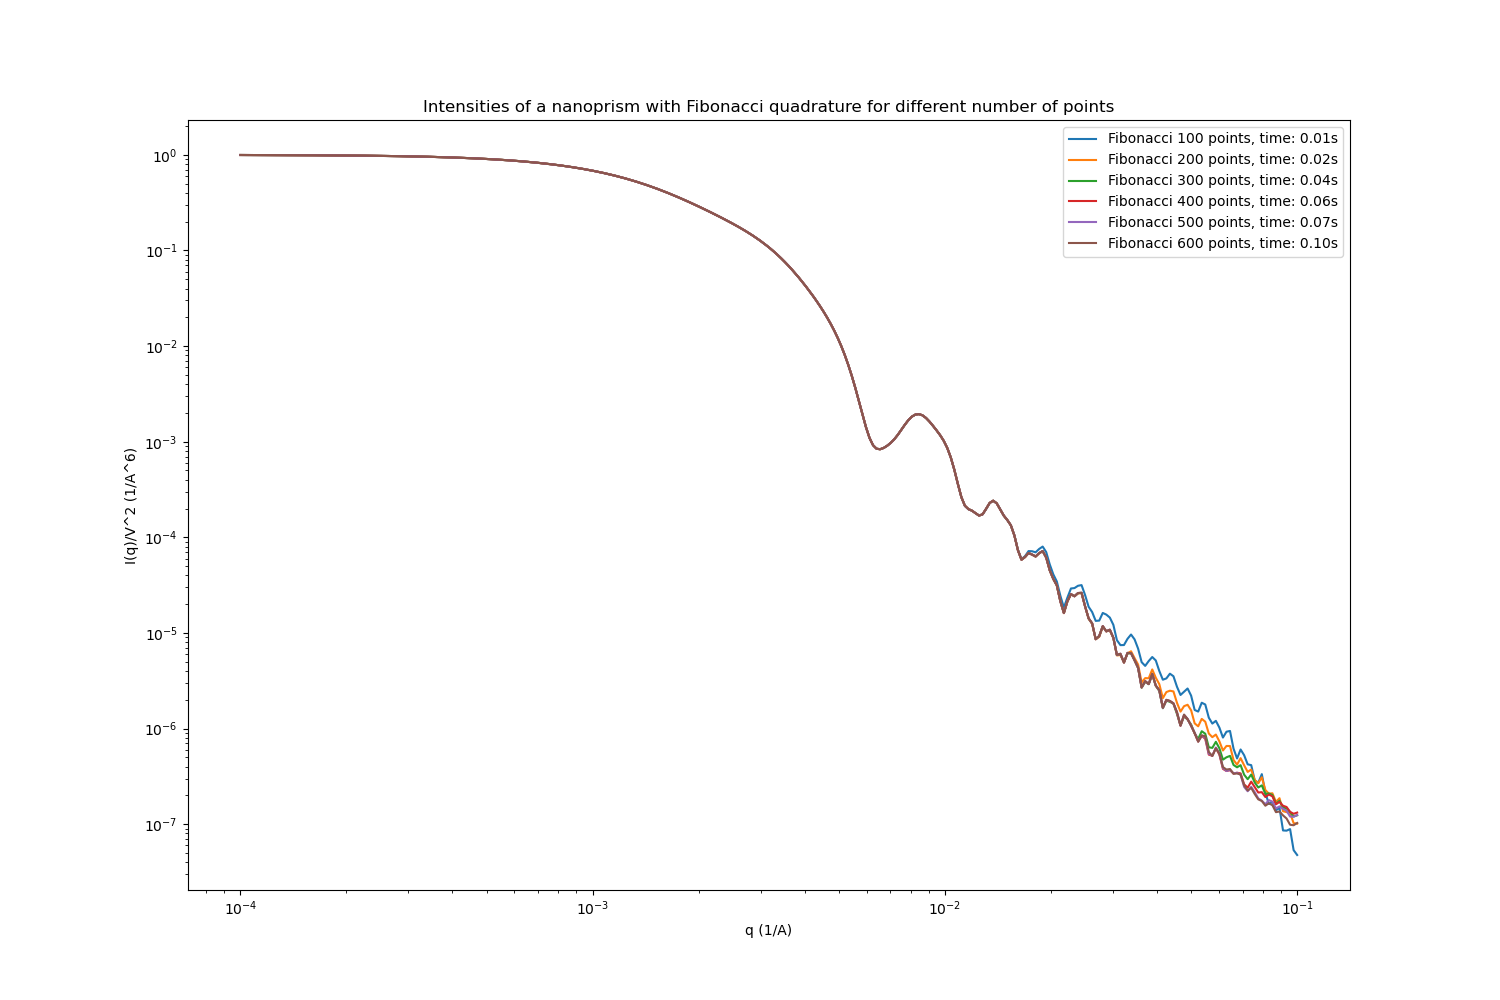

In [14]:
# apply the factor
from matplotlib import pyplot as plt

qs = np.logspace(-4,-1,300,base=10)

# Choose different number of points for fibonacci
npoints_fibonacci_1 = 100 
npoints_fibonacci_2 = 200
npoints_fibonacci_3 = 300
npoints_fibonacci_4 = 400
npoints_fibonacci_5 = 500
npoints_fibonacci_6 = 600


# Define Iq, computational time and the number of total points 
I_q_fibonacci_1, time_fib_1, total_points_fibonacci_1 = Iq_fibonacci(qs,sld,sld_solvent,nsides,Rave,L,npoints_fibonacci_1)
I_q_fibonacci_2, time_fib_2, total_points_fibonacci_2 = Iq_fibonacci(qs,sld,sld_solvent,nsides,Rave,L,npoints_fibonacci_2)
I_q_fibonacci_3, time_fib_3, total_points_fibonacci_3 = Iq_fibonacci(qs,sld,sld_solvent,nsides,Rave,L,npoints_fibonacci_3)
I_q_fibonacci_4, time_fib_4, total_points_fibonacci_4 = Iq_fibonacci(qs,sld,sld_solvent,nsides,Rave,L,npoints_fibonacci_4)
I_q_fibonacci_5, time_fib_5, total_points_fibonacci_5 = Iq_fibonacci(qs,sld,sld_solvent,nsides,Rave,L,npoints_fibonacci_5)
I_q_fibonacci_6, time_fib_6, total_points_fibonacci_6 = Iq_fibonacci(qs,sld,sld_solvent,nsides,Rave,L,npoints_fibonacci_6)



# Plot the results

plt.figure(figsize=(15, 10))
plt.size=(20,30)

plt.loglog(qs,I_q_fibonacci_1/volume(nsides,Rave,L)**2, label=f'Fibonacci {total_points_fibonacci_1} points, time: {time_fib_1:.2f}s' )
plt.loglog(qs,I_q_fibonacci_2/volume(nsides,Rave,L)**2, label=f'Fibonacci {total_points_fibonacci_2} points, time: {time_fib_2:.2f}s' )
plt.loglog(qs,I_q_fibonacci_3/volume(nsides,Rave,L)**2, label=f'Fibonacci {total_points_fibonacci_3} points, time: {time_fib_3:.2f}s' )
plt.loglog(qs,I_q_fibonacci_4/volume(nsides,Rave,L)**2, label=f'Fibonacci {total_points_fibonacci_4} points, time: {time_fib_4:.2f}s' )
plt.loglog(qs,I_q_fibonacci_5/volume(nsides,Rave,L)**2, label=f'Fibonacci {total_points_fibonacci_5} points, time: {time_fib_5:.2f}s' )
plt.loglog(qs,I_q_fibonacci_6/volume(nsides,Rave,L)**2, label=f'Fibonacci {total_points_fibonacci_6} points, time: {time_fib_6:.2f}s' )

plt.xlabel('q (1/A)')
plt.ylabel('I(q)/V^2 (1/A^6)')
plt.title('Intensities of a nanoprism with Fibonacci quadrature for different number of points')
plt.legend()

### Gauss legendre

Execution time Gauss-Legendre with 100 points: 0.0127 seconds
Execution time Gauss-Legendre with 2500 points: 0.3518 seconds
Execution time Gauss-Legendre with 10000 points: 1.3853 seconds
Execution time Gauss-Legendre with 22500 points: 3.1891 seconds
Execution time Gauss-Legendre with 40000 points: 5.7424 seconds
Execution time Gauss-Legendre with 250000 points: 42.3696 seconds


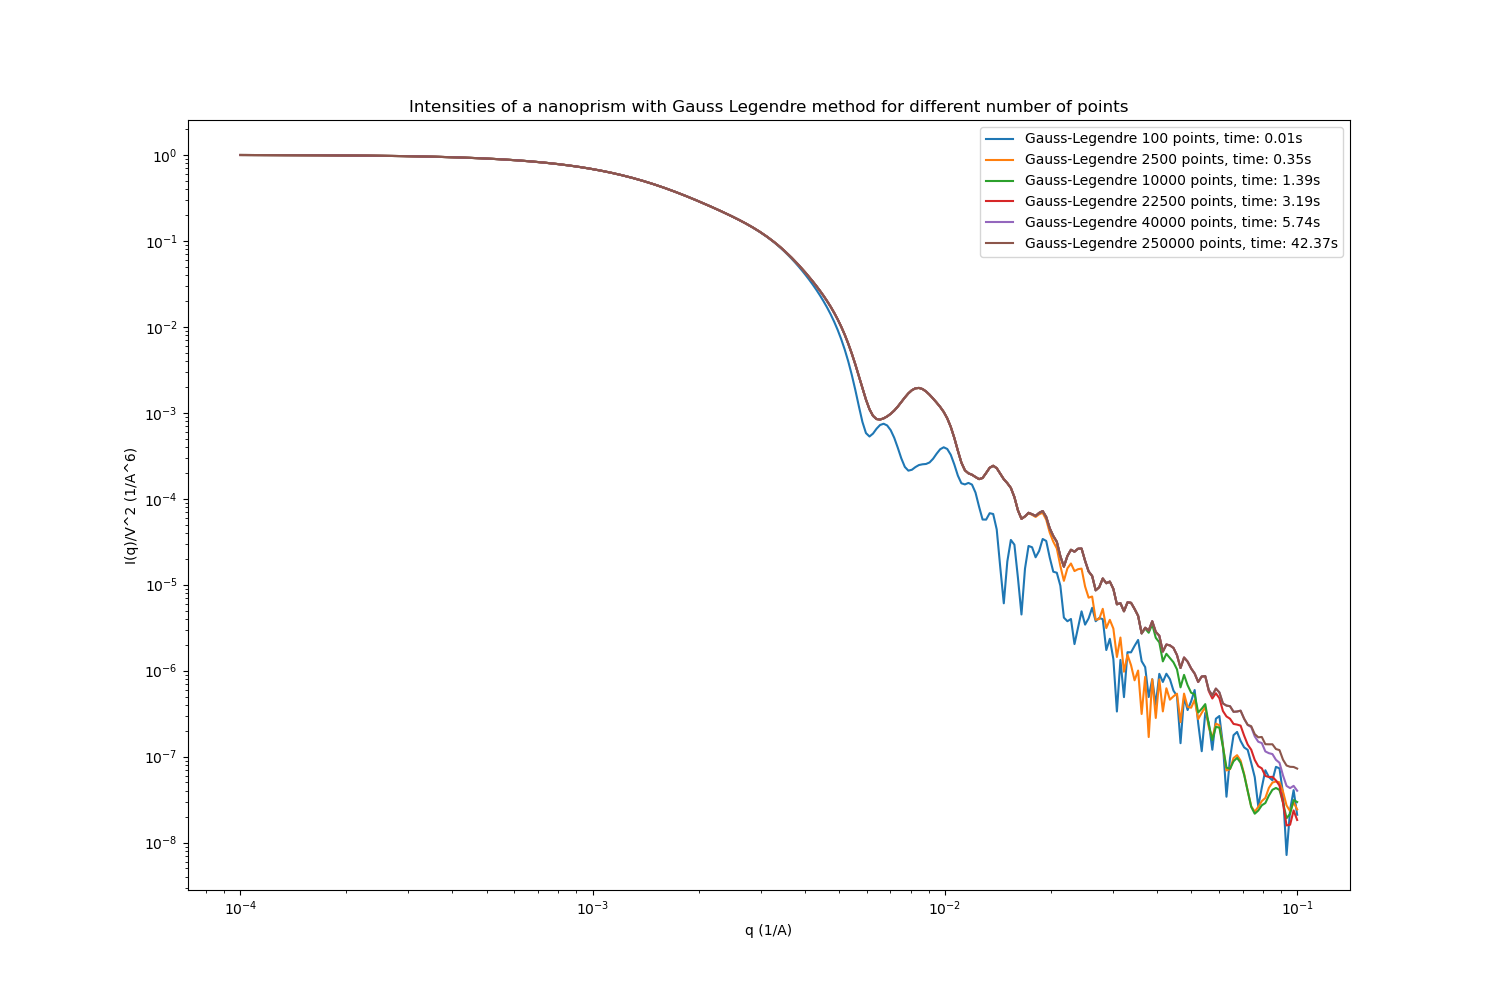

In [15]:
# apply the factor
from matplotlib import pyplot as plt

qs = np.logspace(-4,-1,300,base=10)

# Choose different number of points for gauss-legendre
npoints_gauss_legendre_10 = 10 # number of points per angles (n_total = npoints_gauss_legendre**2) for gauss-legendre
npoints_gauss_legendre_50 = 50 
npoints_gauss_legendre_100 = 100 
npoints_gauss_legendre_150 = 150 
npoints_gauss_legendre_200 = 200 
npoints_gauss_legendre_500 = 500 


# Define Iq, computional times and number of total points
I_q_gauss_legendre_10, time_gauss_10, total_points_gauss_10 = Iq_gauss_legendre(qs,sld,sld_solvent,nsides,Rave,L,npoints_gauss_legendre_10)
I_q_gauss_legendre_50, time_gauss_50, total_points_gauss_50 = Iq_gauss_legendre(qs,sld,sld_solvent,nsides,Rave,L,npoints_gauss_legendre_50)
I_q_gauss_legendre_100, time_gauss_100, total_points_gauss_100 = Iq_gauss_legendre(qs,sld,sld_solvent,nsides,Rave,L,npoints_gauss_legendre_100)
I_q_gauss_legendre_150, time_gauss_150, total_points_gauss_150 = Iq_gauss_legendre(qs,sld,sld_solvent,nsides,Rave,L,npoints_gauss_legendre_150)
I_q_gauss_legendre_200, time_gauss_200, total_points_gauss_200 = Iq_gauss_legendre(qs,sld,sld_solvent,nsides,Rave,L,npoints_gauss_legendre_200)
I_q_gauss_legendre_500, time_gauss_500, total_points_gauss_500 = Iq_gauss_legendre(qs,sld,sld_solvent,nsides,Rave,L,npoints_gauss_legendre_500)



# Plot the results

plt.figure(figsize=(15, 10))
plt.size=(20,30)

plt.loglog(qs,I_q_gauss_legendre_10/volume(nsides,Rave,L)**2, label=f'Gauss-Legendre {total_points_gauss_10} points, time: {time_gauss_10:.2f}s' )
plt.loglog(qs,I_q_gauss_legendre_50/volume(nsides,Rave,L)**2, label=f'Gauss-Legendre {total_points_gauss_50} points, time: {time_gauss_50:.2f}s' )
plt.loglog(qs,I_q_gauss_legendre_100/volume(nsides,Rave,L)**2, label=f'Gauss-Legendre {total_points_gauss_100} points, time: {time_gauss_100:.2f}s' )
plt.loglog(qs,I_q_gauss_legendre_150/volume(nsides,Rave,L)**2, label=f'Gauss-Legendre {total_points_gauss_150} points, time: {time_gauss_150:.2f}s' )
plt.loglog(qs,I_q_gauss_legendre_200/volume(nsides,Rave,L)**2, label=f'Gauss-Legendre {total_points_gauss_200} points, time: {time_gauss_200:.2f}s' )
plt.loglog(qs,I_q_gauss_legendre_500/volume(nsides,Rave,L)**2, label=f'Gauss-Legendre {total_points_gauss_500} points, time: {time_gauss_500:.2f}s' )   
plt.xlabel('q (1/A)')
plt.ylabel('I(q)/V^2 (1/A^6)')
plt.title('Intensities of a nanoprism with Gauss Legendre method for different number of points')
plt.legend()

### Compare the time of execution of the three quadratures for a similar curve (converged one)

Execution time Lebedev with 3074 points: 0.4414 seconds
Execution time Fibonacci with 400 points: 0.0534 seconds
Execution time Gauss-Legendre with 40000 points: 5.3285 seconds


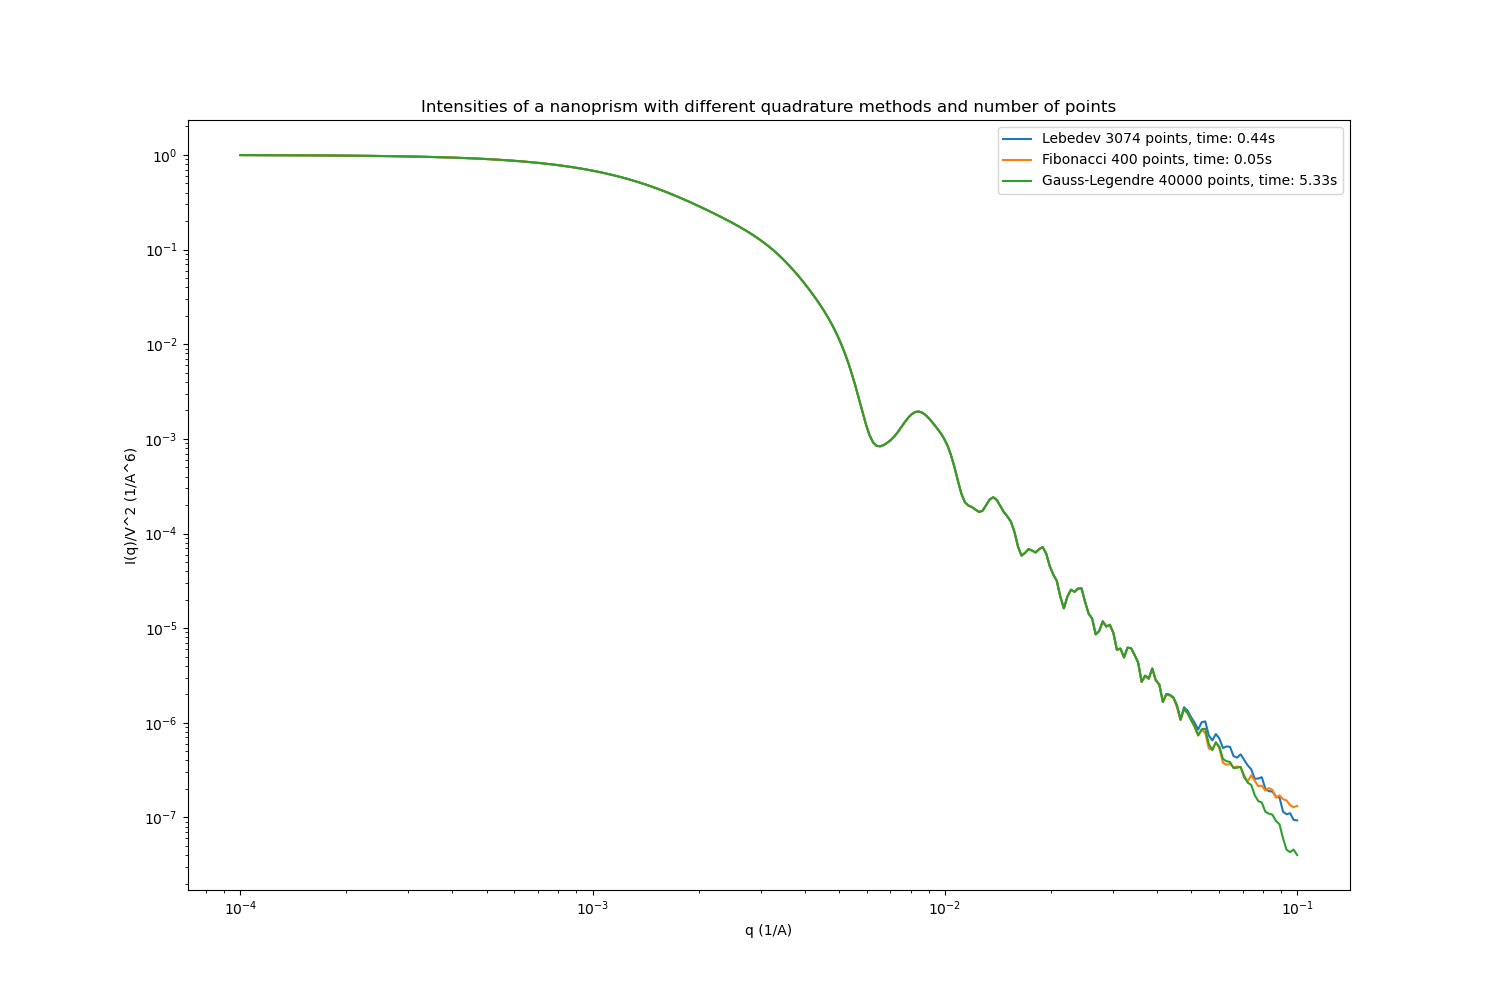

In [16]:
# apply the factor
from matplotlib import pyplot as plt

qs = np.logspace(-4,-1,300,base=10)

# Choose different number of points for each methods (here to  the number of points that seem to converge)
norder_lebedev = 25 # order for lebedev = 131
npoints_fibonacci = 400 # number of total points for fibonacci
npoints_gauss_legendre= 200 # number of points per angles (n_total = npoints_gauss_legendre**2) for gauss-legendre


# Define Iq, computaional times and total number of points for each quadrature methods and number of points 
I_q_lebedev, time_lebedev, total_points_lebedev = Iq_lebedev(qs,sld,sld_solvent,nsides,Rave,L,norder_lebedev)
I_q_fibonacci, time_fib, total_points_fibonacci = Iq_fibonacci(qs,sld,sld_solvent,nsides,Rave,L,npoints_fibonacci)
I_q_gauss_legendre, time_gauss_legendre, total_points_gauss_legendre = Iq_gauss_legendre(qs,sld,sld_solvent,nsides,Rave,L,npoints_gauss_legendre)

# Plot the results

plt.figure(figsize=(15, 10))
plt.size=(20,30)
plt.loglog(qs,I_q_lebedev/volume(nsides,Rave,L)**2 ,label=f'Lebedev {total_points_lebedev} points, time: {time_lebedev:.2f}s' )
plt.loglog(qs,I_q_fibonacci/volume(nsides,Rave,L)**2, label=f'Fibonacci {total_points_fibonacci} points, time: {time_fib:.2f}s' )
plt.loglog(qs,I_q_gauss_legendre/volume(nsides,Rave,L)**2, label=f'Gauss-Legendre {total_points_gauss_legendre} points, time: {time_gauss_legendre:.2f}s' )

plt.xlabel('q (1/A)')
plt.ylabel('I(q)/V^2 (1/A^6)')
plt.title('Intensities of a nanoprism with different quadrature methods and number of points')
plt.legend()

The Gauss-Legendre quadrature seems less efficient when it comes to computational cost.

# Comparing SasView + quadratures and Debye calculator for a nanoprism of cobalt (ongoing work)

### 1. SasView nanoprism creation

len(q) 1600
len(qs) 1600
Execution time Lebedev with 3074 points: 2.8875 seconds
Execution time Fibonacci with 400 points: 0.3778 seconds
Execution time Gauss-Legendre with 40000 points: 37.1670 seconds


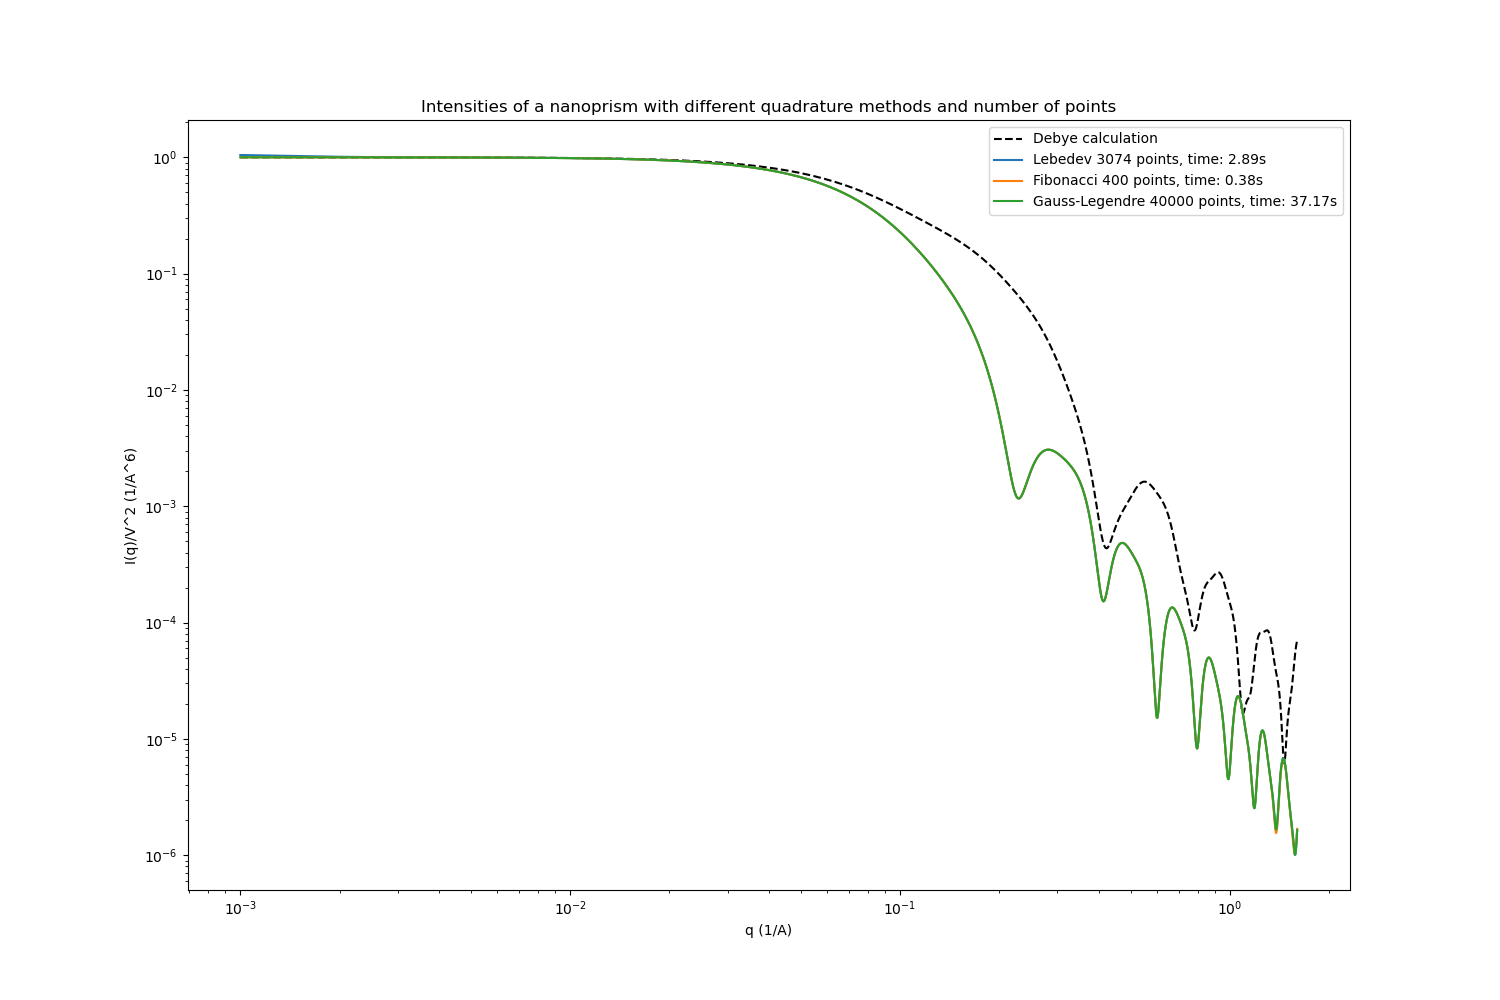

In [12]:
# Debye calculation of the nanowire 
# from debyecalculator import DebyeCalculator
from matplotlib import pyplot as plt
import numpy as np


# Debye method

# calc = DebyeCalculator(qmin=0.0001, qmax=0.1, qstep=0.001, qdamp=0.0, biso=0.0)
# q, iq = calc.iq(path)
file = "CoWire_Iq_2.txt" # file that contains the calculated Debye intensity of the nanowire
iq = np.loadtxt(file)
q = iq[:,0]
iq = iq[:,1]
# Normalize the intensity by the number of atoms and the atomic number for the Debye method
Z_2 = 27**2
N_2 = 1536**2
iq_debye = iq / (Z_2 * N_2)
print('len(q)', len(q))



# SasView method

sld = 1
sld_solvent = 0
nsides = 6
Rave = 17 # Angstrom (same dimensions that the xyz structure used for the Debye calculation)
L = 63.08# Angstrom

qs = np.arange(0.001,1.6,0.001) # same q range as the Debye calculation
print('len(qs)', len(qs))

# Choose the number of points that seem to converge for each methods (for comparison with the Debye method)
norder_lebedev = 25 # order for lebedev = 131
npoints_fibonacci = 400 # number of total points for fibonacci
npoints_gauss_legendre= 200 # number of points per angles (n_total = npoints_gauss_legendre**2) for gauss-legendre

# Define Iq and times for each quadrature methods and number of points
I_q_lebedev, time_lebedev, total_points_lebedev = Iq_lebedev(qs,sld,sld_solvent,nsides,Rave,L,norder_lebedev)
I_q_fibonacci, time_fib, total_points_fibonacci = Iq_fibonacci(qs,sld,sld_solvent,nsides,Rave,L,npoints_fibonacci)
I_q_gauss_legendre, time_gauss_legendre, total_points_gauss_legendre = Iq_gauss_legendre(qs,sld,sld_solvent,nsides,Rave,L,npoints_gauss_legendre)




# Plot the results : debye, and sas view methods

plt.figure(figsize=(15, 10))
plt.size=(20,30)
plt.loglog(qs,iq_debye/0.5, label='Debye calculation', color='black', linestyle='dashed')
plt.loglog(qs,I_q_lebedev/volume(nsides,Rave,L)**2 ,label=f'Lebedev {total_points_lebedev} points, time: {time_lebedev:.2f}s' )
plt.loglog(qs,I_q_fibonacci/volume(nsides,Rave,L)**2, label=f'Fibonacci {total_points_fibonacci} points, time: {time_fib:.2f}s' )
plt.loglog(qs,I_q_gauss_legendre/volume(nsides,Rave,L)**2, label=f'Gauss-Legendre {total_points_gauss_legendre} points, time: {time_gauss_legendre:.2f}s' )

plt.xlabel('q (1/A)')
plt.ylabel('I(q)/V^2 (1/A^6)')
plt.title('Intensities of a nanoprism with different quadrature methods and number of points')
plt.legend()

Shift observed : issue with the sizes correspondance ?